**Importing Libraries** 



In [1]:
import os
import random
import tensorflow as tf 
import numpy as np
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array , load_img
import warnings
warnings.filterwarnings('ignore')

Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Training data from drive
- Using augmentation configuration
- Using generator to read images

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_images = "/content/drive/MyDrive/chest_xray/train"
train_datagen = ImageDataGenerator(rescale = 1./255,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

train_generator.class_indices

Found 5216 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

**Loading validation data**

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


**Preview of train Images from normal and Pneumonia infected Xrays**

Text(0.5, 1.0, 'PNEUMONIA - person743_bacteria_2646.jpeg')

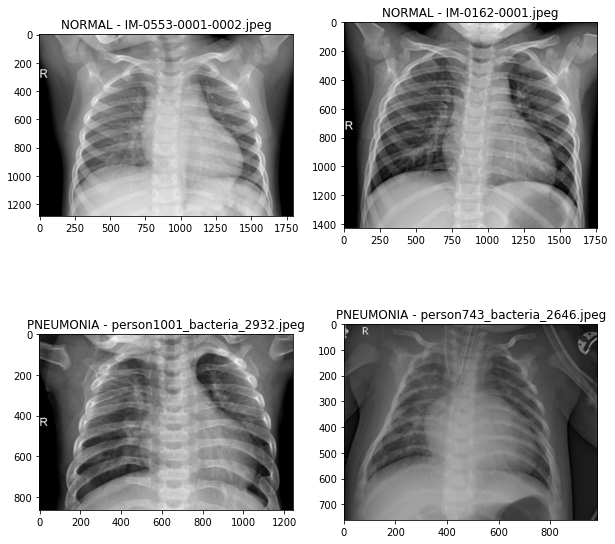

In [6]:
trainnormal = "/content/drive/MyDrive/chest_xray/train/NORMAL"
dir_list1 = os.listdir(trainnormal) 
random_image1 = random.choice(dir_list1)
img_normal = load_img(train_images + '/NORMAL/' + random_image1)
random_image2 = random.choice(dir_list1)
img_normal1 = load_img(train_images + '/NORMAL/' + random_image2)

trainpnuemonia = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
dir_list2 = os.listdir(trainpnuemonia) 
random_image3 = random.choice(dir_list2)
img_pneumonia = load_img(train_images + '/PNEUMONIA/' + random_image3)
random_image4 = random.choice(dir_list2)
img_pneumonia1 = load_img(train_images + '/PNEUMONIA/' + random_image4)


fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0][0].imshow(img_normal)
axs[0][0].set_title("NORMAL - " + random_image1)
axs[0][1].imshow(img_normal1)
axs[0][1].set_title("NORMAL - " + random_image2)
axs[1][0].imshow(img_pneumonia)
axs[1][0].set_title("PNEUMONIA - " + random_image3)
axs[1][1].imshow(img_pneumonia1)
axs[1][1].set_title("PNEUMONIA - " + random_image4)

**CNN Using Tensorflow**

In [11]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                  
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
                                   ])
#Displaying model properties
print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

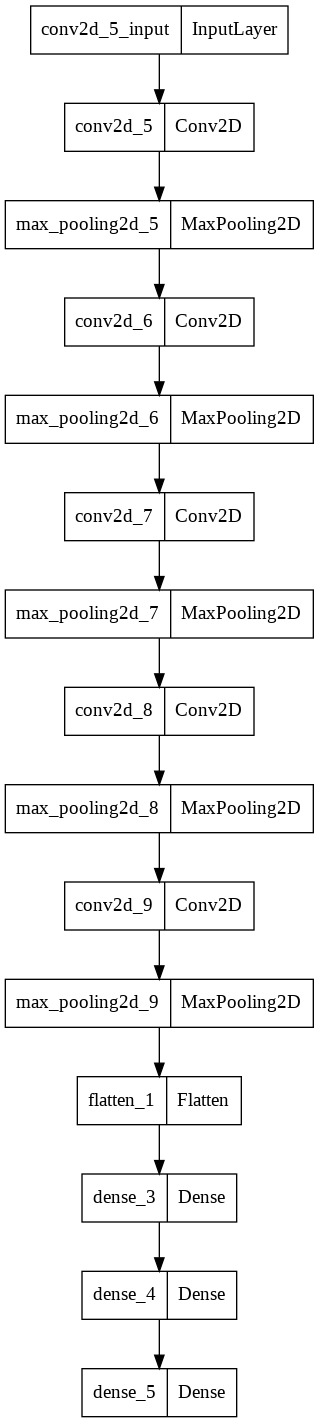

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model)

**Training the model for 20 epochs**

In [13]:
history = model.fit(train_generator, epochs = 20, validation_data = validation_generator)

Epoch 1/20
41/41 [==============================] - 604s 15s/step - loss: 0.5011 - accuracy: 0.7747 - val_loss: 0.8711 - val_accuracy: 0.6875
Epoch 2/20
41/41 [==============================] - 600s 15s/step - loss: 0.3182 - accuracy: 0.8579 - val_loss: 0.4821 - val_accuracy: 0.8125
Epoch 3/20
41/41 [==============================] - 599s 15s/step - loss: 0.2663 - accuracy: 0.8850 - val_loss: 0.5218 - val_accuracy: 0.6250
Epoch 4/20
41/41 [==============================] - 601s 15s/step - loss: 0.2682 - accuracy: 0.8865 - val_loss: 0.5788 - val_accuracy: 0.6875
Epoch 5/20
41/41 [==============================] - 600s 15s/step - loss: 0.2511 - accuracy: 0.8913 - val_loss: 0.3856 - val_accuracy: 0.8125
Epoch 6/20
41/41 [==============================] - 599s 15s/step - loss: 0.2340 - accuracy: 0.9022 - val_loss: 0.8329 - val_accuracy: 0.6875
Epoch 7/20
41/41 [==============================] - 604s 15s/step - loss: 0.2026 - accuracy: 0.9193 - val_loss: 0.4644 - val_accuracy: 0.8125
Epoch 

Loss Vs Number of Epochs


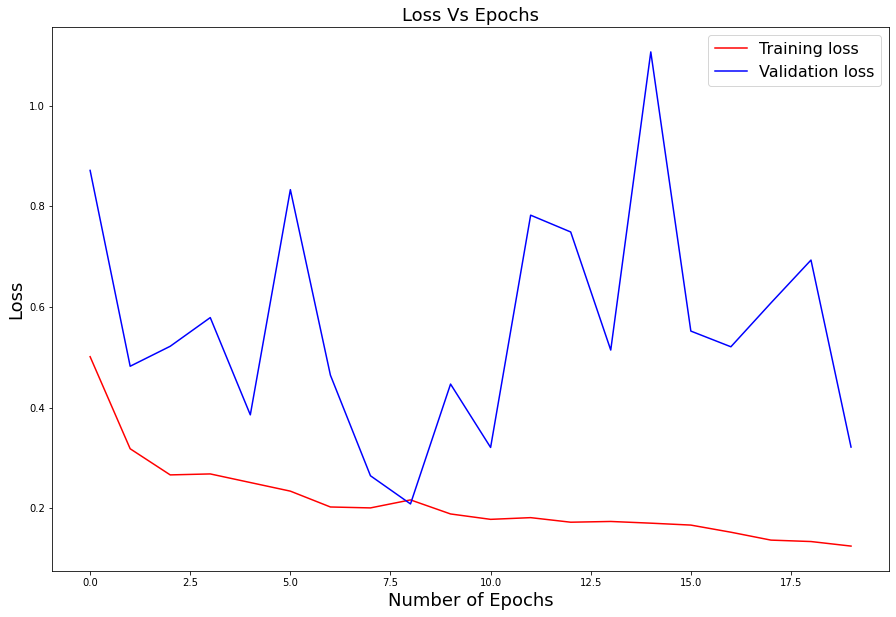

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15,10))
plt.plot(loss,c='red')
plt.plot(val_loss,c='blue')
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Number of Epochs", fontsize=18)
plt.ylabel("Loss", fontsize=18)
print("Loss Vs Number of Epochs")
plt.show()

Accuracy Vs Epochs


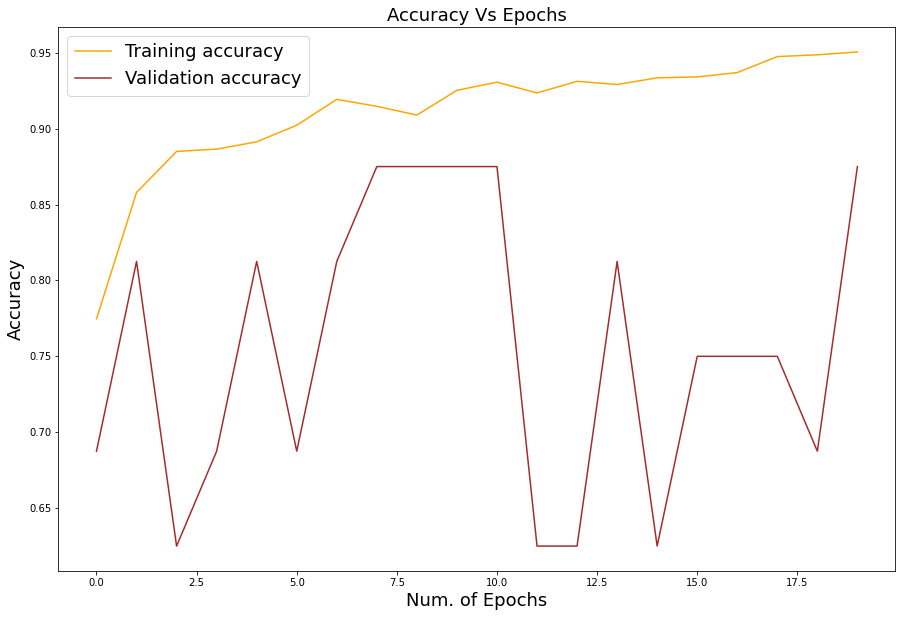

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(15, 10))
plt.plot(acc,c='orange')
plt.plot(val_acc,c='brown')
plt.legend(['Training accuracy','Validation accuracy'], fontsize=18)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
print("Accuracy Vs Epochs")
plt.show()

<h3>Saving the model</h3>

In [25]:
model.save("trained.h5")

<h3>Loading the saved model</h3>

In [26]:
from keras.models import load_model
model = load_model("trained.h5")

**Loading the test data**

In [27]:
evaluation_datagen = ImageDataGenerator(rescale = 1/255)
test_generator = evaluation_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)
evaluation_result = model.evaluate_generator(test_generator)
#Displaying Loss and Accuracy from the evaluation
print('\nLoss is:', evaluation_result[0])
print('Accuracy is :', evaluation_result[1])

Found 624 images belonging to 2 classes.

Loss is: 0.24850937724113464
Accuracy is : 0.9102563858032227


**Image Prediction from test data**

In [28]:
#loading an image from normal folder in test data
image= cv2.imread('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0067-0001.jpeg')
plt_image= image
image = cv2.resize(image,(300,300))
image = image/255.0
image = image.reshape(1,300,300,3)
model.predict(image)

array([[0.01481432]], dtype=float32)

Prediction is : Normal


Text(0.5, 1.0, 'Prediction: Normal')

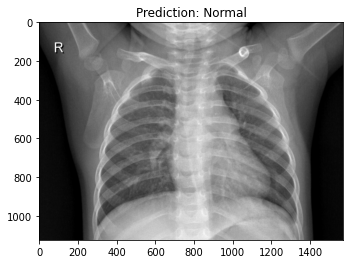

In [29]:
prediction = model.predict(image) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction is : "+prediction)
plt.imshow(plt_image)
plt.title("Prediction: "+prediction)

In [30]:
#loading an image from Pneumonia folder in test data
image1= cv2.imread('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person110_bacteria_531.jpeg')
plt_image1= image1
image1 = cv2.resize(image1,(300,300))
image1 = image1/255.0
image1 = image1.reshape(1,300,300,3)
model.predict(image1)

array([[0.98673326]], dtype=float32)

Prediction is : Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

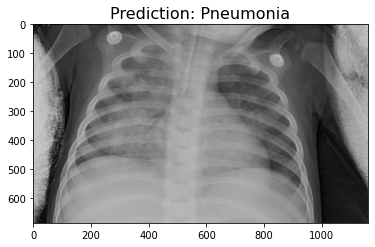

In [31]:
prediction = model.predict(image1) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction is : "+prediction)
plt.imshow(plt_image1)
plt.title("Prediction: "+prediction, fontsize=16)